In [1]:
# importing the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\breast_cancer_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
data.shape

(569, 32)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
## Label Encoding for Diagnosis column

In [14]:
data['diagnosis']=data['diagnosis'].astype('category')
data['diagnosis']=data['diagnosis'].cat.codes

In [15]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [16]:
data.drop('id',axis=1,inplace=True)

In [17]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# dep/Target and ind var
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [20]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int8

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn.predict(x_test)
print(y_pred)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1]


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
# Training Accuracy
print('tr accuracy',accuracy_score(y_train,knn.predict(x_train)))

tr accuracy 0.9428571428571428


In [36]:
# Testing Accuracy
print('test accuracy',accuracy_score(y_test,knn.predict(x_test)))

test accuracy 0.956140350877193


In [37]:
confusion_matrix(y_test,y_pred)

array([[71,  1],
       [ 4, 38]], dtype=int64)

### Using PCA

In [38]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA()
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [41]:
print(x_train_pca.shape,x_test_pca.shape)

(455, 30) (114, 30)


In [43]:
explained_var=pca.explained_variance_ratio_
print(explained_var)

[9.83320952e-01 1.47893157e-02 1.68097293e-03 1.16624556e-04
 8.05710370e-05 6.31389874e-06 3.93304005e-06 7.16173023e-07
 3.26595898e-07 1.74390399e-07 6.59767406e-08 1.65200862e-08
 6.83628163e-09 4.60243066e-09 2.10211585e-09 1.24958590e-09
 8.01894759e-10 4.80901068e-10 3.98913017e-10 3.20863193e-10
 1.60258035e-10 1.15480654e-10 7.34705192e-11 5.90307153e-11
 3.32791169e-11 2.36795383e-11 6.53387971e-12 5.71392576e-12
 2.98867991e-12 1.27627914e-12]


In [ ]:
## we can consider 2 or 3 components as they are capturing 
##  more variance

In [45]:
pca=PCA(n_components=2)
x_train_pca_2=pca.fit_transform(x_train)
x_test_pca_2=pca.transform(x_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_pca_2,y_train)

KNeighborsClassifier()

In [47]:
# Training Accuracy
print('tr accuracy',accuracy_score(y_train,knn.predict(x_train_pca_2)))

tr accuracy 0.9318681318681319


In [48]:
# Testing Accuracy
print('test accuracy',accuracy_score(y_test,knn.predict(x_test_pca_2)))

test accuracy 0.956140350877193


In [ ]:
### Visualization

In [49]:
print(x_train_pca_2)

[[-6.70008018e+01 -3.98158157e+00]
 [-3.94857832e+02  4.37729761e+00]
 [-3.02089850e+02  4.78398253e+01]
 [ 1.21152779e+02 -3.95922694e+00]
 [ 2.32223231e+02 -1.08721538e+02]
 [ 1.26436629e+03 -9.48967907e+01]
 [ 2.36447467e+03  7.41143009e+02]
 [ 1.05858619e+03 -5.18910637e+01]
 [ 9.88082822e+02  1.53385974e+02]
 [-4.67816311e+02  4.62323182e+00]
 [-7.02338931e+01  3.81054356e+01]
 [-6.20218755e+02 -2.65311317e+01]
 [-5.18133843e+02  7.92020184e+00]
 [-5.95804384e+02 -2.76088434e+01]
 [ 1.21891643e+02  1.16055208e+02]
 [-2.04704014e+02  4.00532666e+01]
 [ 1.37278214e+03 -6.78515904e+01]
 [ 9.00446470e+02 -3.97433963e+01]
 [ 2.43710774e+02  1.13935243e+02]
 [-2.87941293e+02  7.81302342e+00]
 [-1.88596507e+02  3.17696054e+01]
 [-4.18925660e+02 -8.56219778e+00]
 [ 9.36208811e+02  2.84004385e+02]
 [ 4.16564223e+01 -1.16081460e+01]
 [ 1.33835603e+03 -2.32855015e+02]
 [-7.40249782e+02 -3.26057346e+01]
 [ 6.45328859e+02 -1.00208519e+01]
 [-4.33263130e+02 -2.67425253e+01]
 [ 8.22403575e+02 -3

<Axes: >

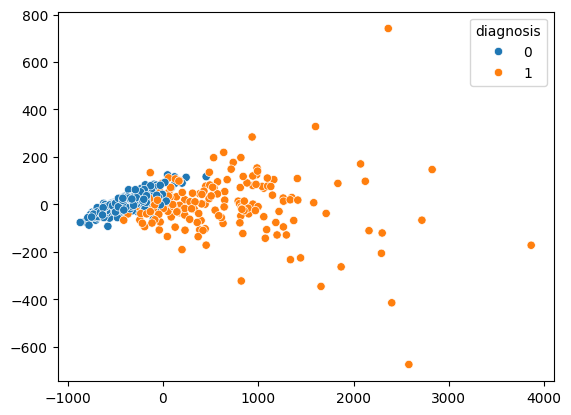

In [54]:
plt.figure()
sns.scatterplot(x=x_train_pca_2[:,0],y=x_train_pca_2[:,1],hue=y_train)

In [55]:
## 3 components